In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
from casadi import *


### Première étape : DOC  $\longrightarrow $ trouver q ( où q est la trajectoire)
On suppose qu'on connait la constante 'c' et on cherche à minimiser notre projectoire x [où x =(abscisse, ordonne, angle)] et u [ où u=(vitesse, vitesse angulaire)]

In [2]:
n = 500           ## notre discrétisation
taux = 1/n              # notre delta_t

#### Soit notre problème (1) suivant :

Soit taux = 1/n 


$$  min_{x^i,u^i} \ \ \frac{1}{2} \tau \sum_{i=0}^{N} (c_1 (u_1^i)^2 + c_2 (u_2^i)^2 )  

\\[0.5 cm]


\ \begin{align*}  

S.C  \ \ \ & x_1^{(i+1)} = x_1^i + \tau u_1^i cos(x_3^i)  \\ 
 & x_2^{(i+1)} = x_2^i + \tau u_1^i sin(x_3^i)   \\
 & x_3^{(i+1)} = x_3^i + \tau u_2^i    \\
 & x^0 = x_{start} \\
 & x^N = x_{goal}
\end{align*}
$$

In [3]:
def tracer_orientation (x,y,theta, r):
    plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' )
    plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' )


In [4]:
# Notre fonction contient au totale 5*n  variable où u1, u2, x1, x2 et x3 sont des vecteur de taille n

# Je defini le vecteur :

u1=SX.sym('u1',n)       ## notre vecteur vitesse

u2=SX.sym('u2',n)       ## notre vecteur vitesse angulaire

## Pour les xi ont va entrer nos xi_initial et xi_final

x1=SX.sym('x1',n)       ## notre vecteur des abssices

x2=SX.sym('x2',n)       ## notre vecteur des ordonnées

x3=SX.sym('x3',n)      ## notre vecteur des angles

Des fonctions qui nous aidera pour résoudre le problème.

In [5]:
f= Function('f',[x1],[x1[1:]])

Minimison maintenant $(1)$

Exemple 1 :

In [6]:
C1_1 = 0.55               
C2_1 = 0.45



x1_1i = -4                   # condition initiale de x1
x2_1i = -0.5                 # condition initiale de x2
x3_1i = pi/2              # condition initiale de x3


x1_1f = 0           # condition final de x1
x2_1f = 0            # condition final de x2
x3_1f = pi/2         # condition final de x3

In [7]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_1*dot(u1,u1)+C2_1*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_1i)        
opti.subject_to( x2[0]==x2_1i)
opti.subject_to( x3[0]==x3_1i)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_1f)
opti.subject_to( x2[-1]==x2_1f)
opti.subject_to( x3[-1]==x3_1f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

#print(sol.value(x1))
#print(sol.value(x2))
#print(sol.value(x3))




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality co

##### Vérifiant si nos résultats sont cohérant.

In [8]:
U1_1 = sol.value(u1)
U2_1 = sol.value(u2)
X1_1 = sol.value(x1)
X2_1 = sol.value(x2)
X3_1 = sol.value(x3)

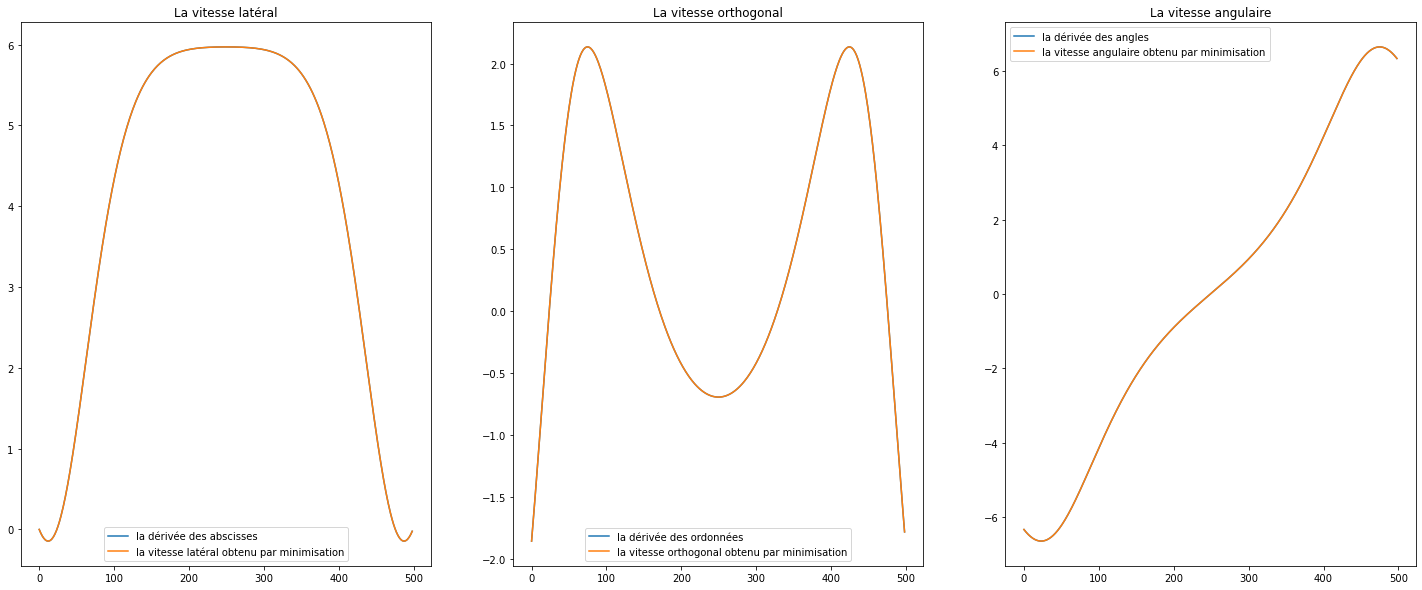

In [9]:
X_1 = (X1_1[1:] - X1_1[:n-1])/taux
X_2 = (X2_1[1:] - X2_1[:n-1])/taux
X_3 = (X3_1[1:] - X3_1[:n-1])/taux

Y_1 = U1_1[:n-1]*cos(X3_1[:n-1])
Y_2 = U1_1[:n-1]*sin(X3_1[:n-1])
Y_3 = U2_1[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

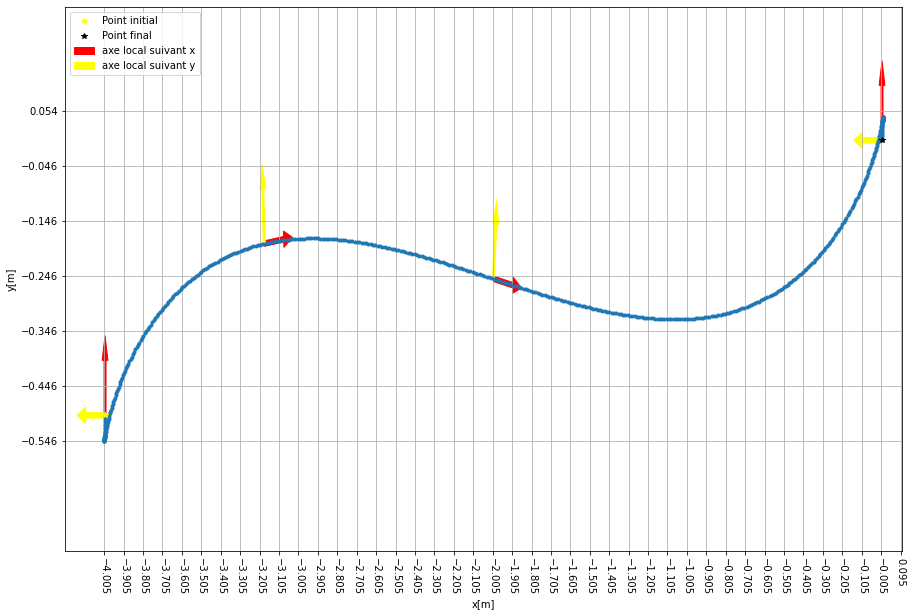

In [102]:
plt.figure(figsize=(15,10))
plt.plot (X1_1,X2_1 , '.')
plt.plot(x1_1i,x2_1i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_1f,x2_1f, '*', label = 'Point final', color = 'black')

plt.arrow(X1_1[0], X2_1[0], 0.1*cos(X3_1[0]),0.1*sin(X3_1[0]), width = 0.01, color = 'red', label = "axe local suivant x" )
plt.arrow(X1_1[0], X2_1[0], 0.1*cos(pi/2+X3_1[0]),0.1*sin(pi/2+X3_1[0]), width = 0.01, color = 'yellow', label = "axe local suivant y" )


tracer_orientation (X1_1[150],X2_1[150],X3_1[150],0.1)

tracer_orientation (X1_1[250],X2_1[250],X3_1[250],0.1)

tracer_orientation (X1_1[-1],X2_1[-1],X3_1[-1],0.1)
plt.xlim(min(X1_1)-0.2, max(X1_1)+0.1)
plt.ylim(min(X2_1)-0.2, max(X2_1)+0.2)


plt.xticks(np.arange(min(X1_1), max(X1_1)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_1),max(X2_1)+0.1, 0.1))


plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

Exemple 2 : 

In [11]:
C1_2 = 0.8
C2_2 = 0.2

x1_2i = -4                   # condition initiale de x1
x2_2i = -3.4                 # condition initiale de x2
x3_2i = pi/4              # condition initiale de x3


x1_2f = 0           # condition final de x1
x2_2f = 0            # condition final de x2
x3_2f = pi/2         # condition final de x3

In [12]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_2*dot(u1,u1)+C2_2*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_2i)        
opti.subject_to( x2[0]==x2_2i)
opti.subject_to( x3[0]==x3_2i)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_2f)
opti.subject_to( x2[-1]==x2_2f)
opti.subject_to( x3[-1]==x3_2f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

#print(sol.value(x1))
#print(sol.value(x2))
#print(sol.value(x3))


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Vérifiant si nos résultats sont cohérant.

In [13]:
U1_2 = sol.value(u1)
U2_2 = sol.value(u2)
X1_2 = sol.value(x1)
X2_2 = sol.value(x2)
X3_2 = sol.value(x3)


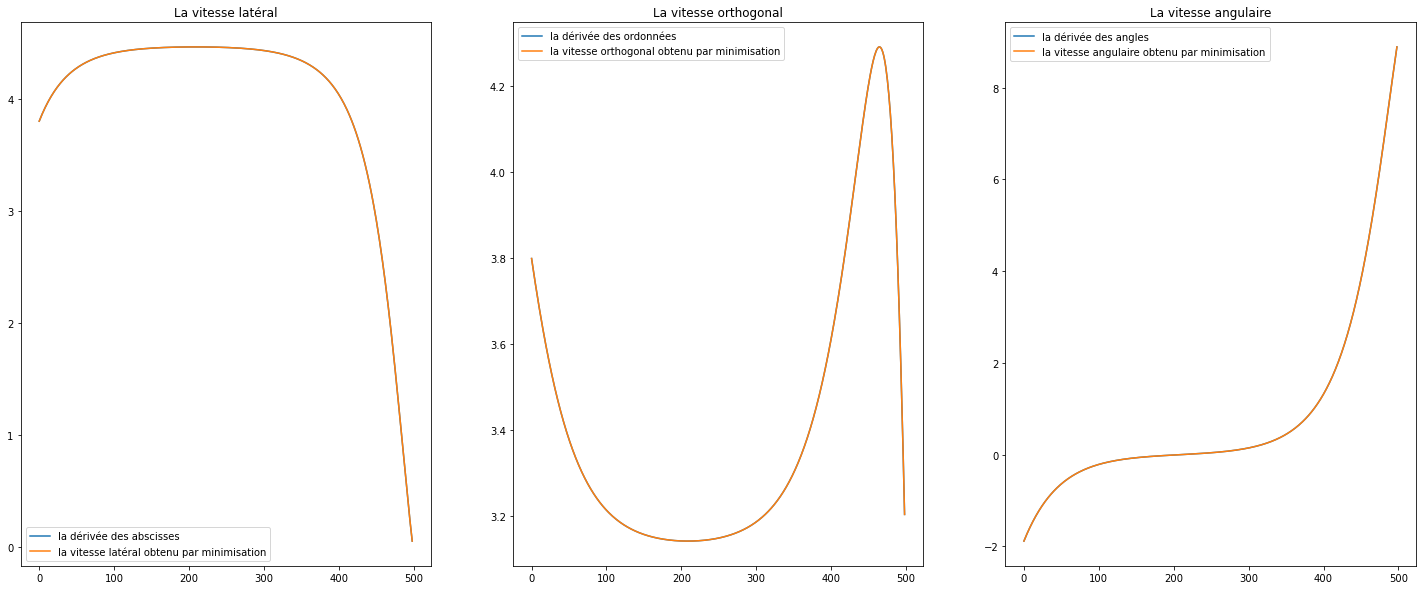

In [14]:
X_1 = (X1_2[1:] - X1_2[:n-1])/taux
X_2 = (X2_2[1:] - X2_2[:n-1])/taux
X_3 = (X3_2[1:] - X3_2[:n-1])/taux

Y_1 = U1_2[:n-1]*cos(X3_2[:n-1])
Y_2 = U1_2[:n-1]*sin(X3_2[:n-1])
Y_3 = U2_2[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

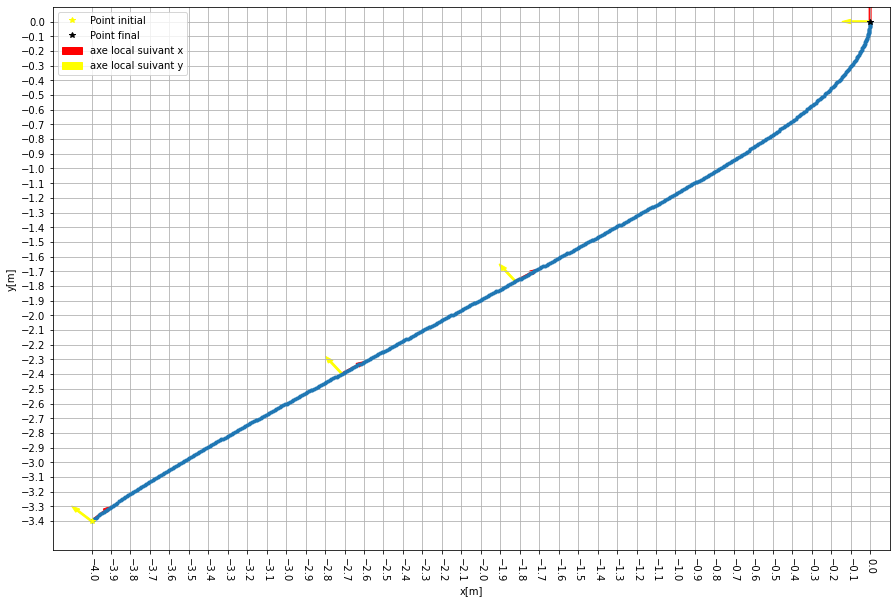

In [103]:
plt.figure(figsize = (15,10))
plt.plot (X1_2,X2_2 , '.')

plt.arrow(X1_2[0], X2_2[0], 0.1*cos(X3_2[0]),0.1*sin(X3_2[0]), width = 0.01, color = 'red', label = "axe local suivant x" )
plt.arrow(X1_2[0], X2_2[0], 0.1*cos(pi/2+X3_2[0]),0.1*sin(pi/2+X3_2[0]), width = 0.01, color = 'yellow', label = "axe local suivant y" )

tracer_orientation (X1_2[150],X2_2[150],X3_2[150],0.1)

tracer_orientation (X1_2[250],X2_2[250],X3_2[250],0.1)

tracer_orientation (X1_2[-1],X2_2[-1],X3_2[-1],0.1)


plt.plot(x1_2i,x2_2i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_2f,x2_2f, '*', label = 'Point final', color = 'black')

plt.xlim(X1_2[0]-0.2, max(X1_2)+0.1)
plt.ylim(X2_2[0]-0.2, max(X2_2)+0.1)


plt.xticks(np.arange(X1_2[0], max(X1_2)+0.1, 0.1), rotation=-90)
plt.yticks(np.arange(X2_2[0], max(X2_2)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

Exemple 3 :

In [16]:

C1_3 = 0.1
C2_3 = 0.9 

x1_3i = -1.2                   # condition initiale de x1
x2_3i = 1.5                 # condition initiale de x2
x3_3i = pi              # condition initiale de x3


x1_3f = 0            # condition final de x1
x2_3f = 0            # condition final de x2
x3_3f = pi/2         # condition final de x3

In [17]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_3*dot(u1,u1)+C2_3*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_3i)        
opti.subject_to( x2[0]==x2_3i)
opti.subject_to( x3[0]==x3_3i)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_3f)
opti.subject_to( x2[-1]==x2_3f)
opti.subject_to( x3[-1]==x3_3f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.14e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Vérifiant si nos résultats sont cohérant.

In [18]:
U1_3 = sol.value(u1)
U2_3 = sol.value(u2)
X1_3 = sol.value(x1)
X2_3 = sol.value(x2)
X3_3 = sol.value(x3)

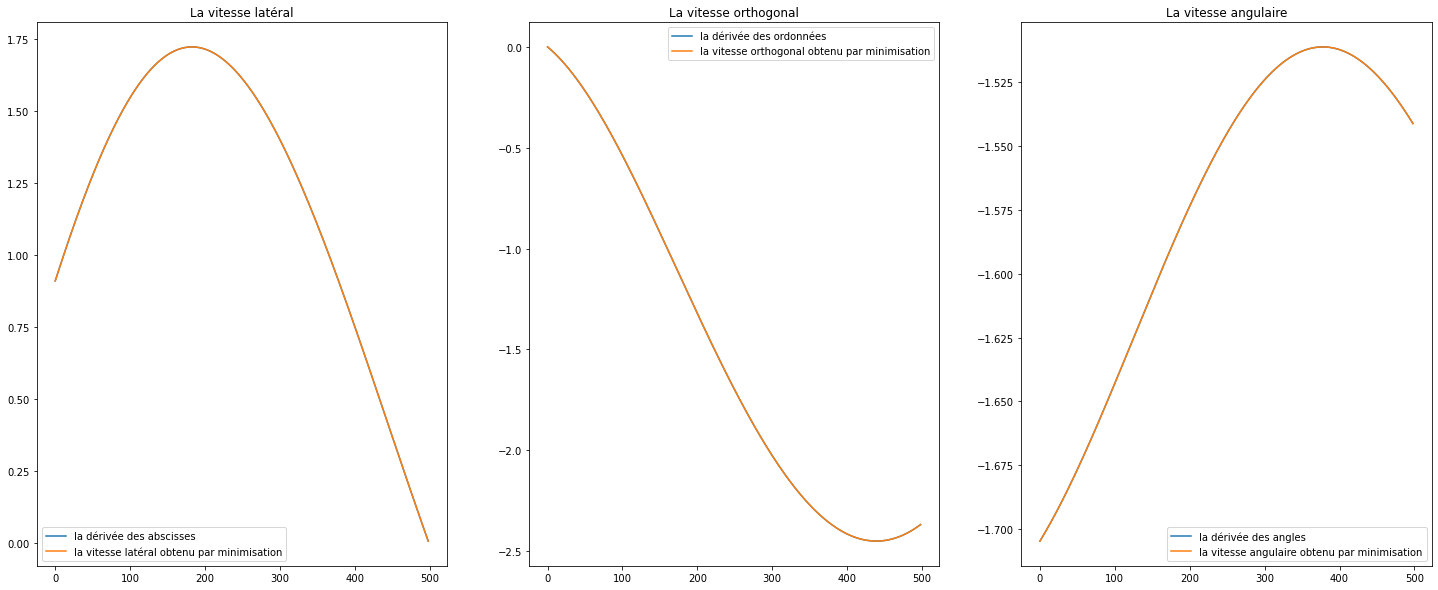

In [19]:
X_1 = (X1_3[1:] - X1_3[:n-1])/taux
X_2 = (X2_3[1:] - X2_3[:n-1])/taux
X_3 = (X3_3[1:] - X3_3[:n-1])/taux

Y_1 = U1_3[:n-1]*cos(X3_3[:n-1])
Y_2 = U1_3[:n-1]*sin(X3_3[:n-1])
Y_3 = U2_3[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

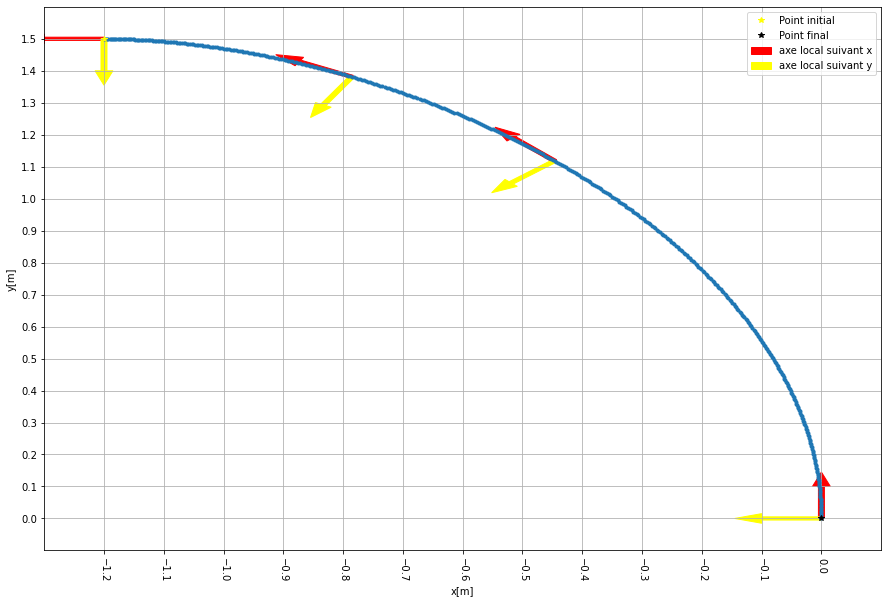

In [104]:
plt.figure(figsize = (15,10))
plt.plot (X1_3,X2_3 , '.')

plt.arrow(X1_3[0], X2_3[0], 0.1*cos(X3_3[0]),0.1*sin(X3_3[0]), width = 0.01, color = 'red', label = "axe local suivant x" )
plt.arrow(X1_3[0], X2_3[0], 0.1*cos(pi/2+X3_3[0]),0.1*sin(pi/2+X3_3[0]), width = 0.01, color = 'yellow', label = "axe local suivant y" )

tracer_orientation (X1_3[150],X2_3[150],X3_3[150],0.1)

tracer_orientation (X1_3[250],X2_3[250],X3_3[250],0.1)

tracer_orientation (X1_3[-1],X2_3[-1],X3_3[-1],0.1)

plt.plot(x1_3i,x2_3i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_3f,x2_3f, '*', label = 'Point final', color = 'black')

plt.xlim(min(X1_3)-0.1, max(X1_3)+0.1)
plt.ylim(min(X2_3)-0.1, max(X2_3)+0.1)


plt.xticks(np.arange(min(X1_3), max(X1_3)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_3), max(X2_3)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()


Exemple 4 : 

In [105]:

C1_4 = 0.55 
C2_4 = 0.45

x1_4i = 0.4                   # condition initiale de x1
x2_4i = 5                 # condition initiale de x2
x3_4i = pi/4              # condition initiale de x3


x1_4f = 10.4            # condition final de x1
x2_4f = 5.6            # condition final de x2
x3_4f = pi/2         # condition final de x3

In [106]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_4*dot(u1,u1)+C2_4*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_4i)        
opti.subject_to( x2[0]==x2_4i)
opti.subject_to( x3[0]==x3_4i)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_4f)
opti.subject_to( x2[-1]==x2_4f)
opti.subject_to( x3[-1]==x3_4f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

#print(sol.value(x1))
#print(sol.value(x2))
#print(sol.value(x3))

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.04e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Vérifiant si nos résultats sont cohérant.

In [107]:
U1_4 = sol.value(u1)
U2_4 = sol.value(u2)
X1_4 = sol.value(x1)
X2_4 = sol.value(x2)
X3_4 = sol.value(x3)

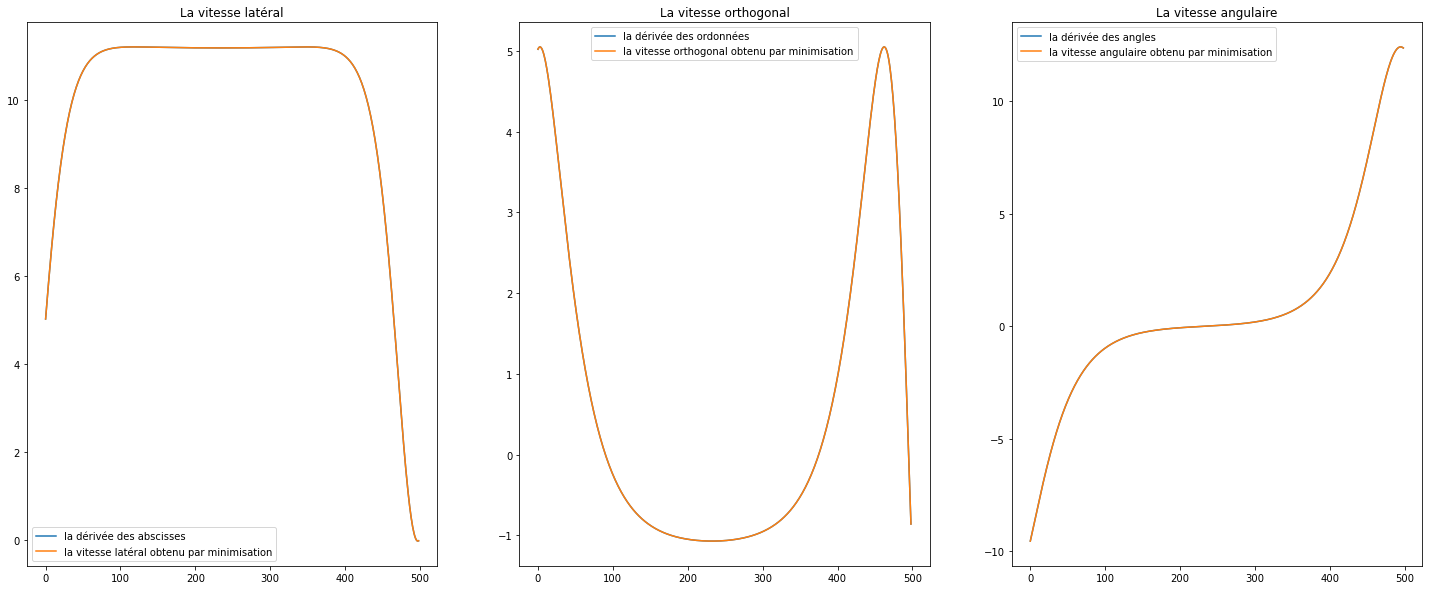

In [108]:
X_1 = (X1_4[1:] - X1_4[:n-1])/taux
X_2 = (X2_4[1:] - X2_4[:n-1])/taux
X_3 = (X3_4[1:] - X3_4[:n-1])/taux

Y_1 = U1_4[:n-1]*cos(X3_4[:n-1])
Y_2 = U1_4[:n-1]*sin(X3_4[:n-1])
Y_3 = U2_4[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


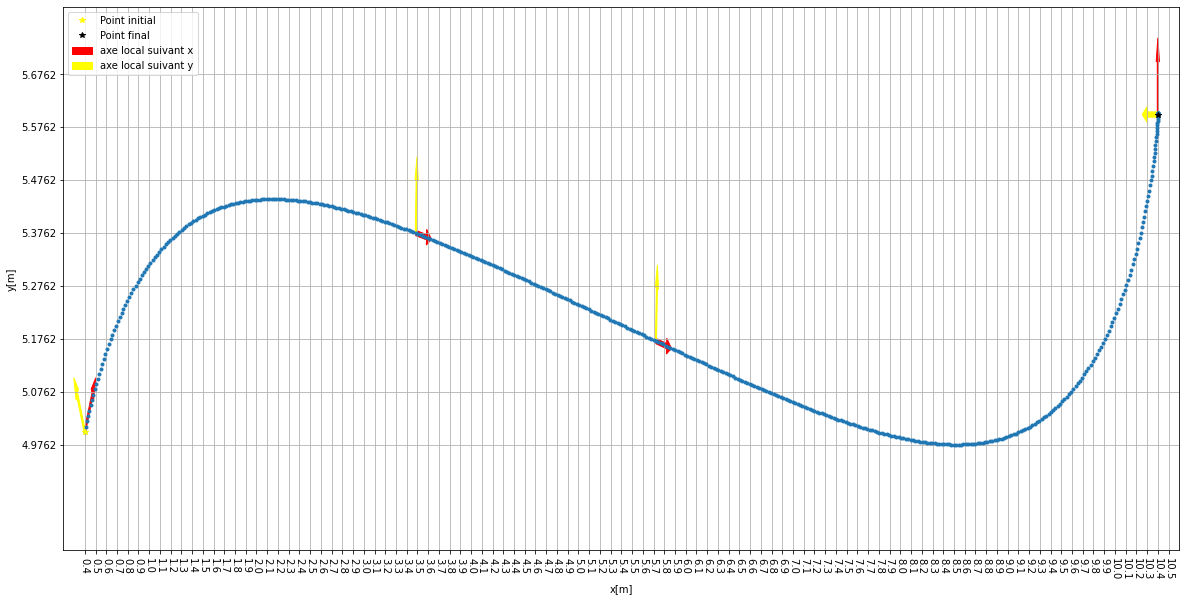

In [110]:
plt.figure(figsize= (20,10))
plt.plot (X1_4,X2_4 , '.')

plt.arrow(X1_4[0], X2_4[0], 0.1*cos(X3_4[0]),0.1*sin(X3_4[0]), width = 0.01, color = 'red', label = "axe local suivant x" )
plt.arrow(X1_4[0], X2_4[0], 0.1*cos(pi/2+X3_4[0]),0.1*sin(pi/2+X3_4[0]), width = 0.01, color = 'yellow', label = "axe local suivant y" )

tracer_orientation (X1_4[150],X2_4[150],X3_4[150],0.1)

tracer_orientation (X1_4[250],X2_4[250],X3_4[250],0.1)

tracer_orientation (X1_4[-1],X2_4[-1],X3_4[-1],0.1)

plt.xlim(min(X1_4)-0.2, max(X1_4)+0.2)
plt.ylim(min(X2_4)-0.2, max(X2_4)+0.2)


plt.plot(x1_4i,x2_4i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_4f,x2_4f, '*', label = 'Point final', color = 'black')


plt.xticks(np.arange(min(X1_4), max(X1_4)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_4), max(X2_4)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

### Deuxième étape : q ( où q est la trajectoire ) $\underrightarrow{IOC} $   trouver c 
On suppose qu'on connait la projectoire x [où x =(abscisse, ordonne, angle)] et u [ où u=(vitesse, vitesse angulaire)] et on cherche à trouver '$c = (c_1,c_2$)'. 

 On va transformer notre problème (1) ci_dessus qui est un problème sous contrainte en un problème sans contrainte. On va écrire notre Lagrangien L sous la forme suivante où h est défini en fonction de nos contrainte :

 $$ L(x^i , u^i , c1, c2, \lambda^i) = \frac{1}{2} \tau \sum_{i=0}^{N} (c_1 (u_1^i)^2 + c_2 (u_2^i)^2 ) + \sum_{i=0}^{N} h^i(x^i,u^i) \lambda^{i+1} $$ 


##### On peut remarquer que notre Lagrangien contient 5N + 1 + 3(N+1) variable au totale avec 5N pour (X,U), 1 pour c et 3(N+1) pour $\lambda$.

In [111]:
x1i = SX.sym('x1i',1)                   
x2i = SX.sym('x2i',1)                
x3i = SX.sym('x3i',1)


x1f = SX.sym('x1f',1)
x2f = SX.sym('x2f',1)
x3f = SX.sym('x3f',1)

In [112]:
# Je defini les vecteurs suivant :

c1 = SX.sym('c1',1)
c2 = SX.sym('c2',1)


u1=SX.sym('u1',n)  
u1_prime = SX.sym('u1_prime', n+1)
u1_prime[0] = 0
u1_prime[n] = 0
u1_prime[1:n] =u1[0:n-1]

u2=SX.sym('u2',n)  
u2_prime = SX.sym('u2_prime', n+1)
u2_prime[0] = 0
u2_prime[n] = 0
u2_prime[1:n] =u2[0:n-1]

x1=SX.sym('x1',n)
x1_prime = SX.sym('x1_prime', n+1)
x1_prime[0] = x1[0]
x1_prime[1:] =x1


x2=SX.sym('x2',n)
x2_prime = SX.sym('x1_prime', n+1)
x2_prime[0] = x2[0]
x2_prime[1:] =x2

x3=SX.sym('x3',n)
x3_prime = SX.sym('x1_prime', n+1)
x3_prime[0] = x3[0]
x3_prime[1:] =x3

Lambda = SX.sym('Lambda',n+1, 3)


In [113]:
p1=vertcat(x1i,x1_prime[2:],x1f)   # Je définis un nouveau vecteur suivant x1 en prenant les n-1 dernières valeurs 
                               #  et la nième valeur vaut x1f
g = Function('g',[x1,x1i,x1f],[p1])

In [114]:
Y1 = (x1_prime+taux*u1_prime*cos(x3_prime) - g(x1,x1i,x1f))
Y2 = (x2_prime+taux*u1_prime*sin(x3_prime) - g(x2,x2i,x2f)) 
Y3 = (x3_prime+taux*u2_prime - g(x3,x3i,x3f))
Y = SX.sym('Y',n+1 , 3)        ## notre contrainte

for i in range (n+1):
    Y[i,0]= Y1[i]
    Y[i,1]= Y2[i]
    Y[i,2]= Y3[i]       
    
Y_function = Function('Y_function', [u1,u2,x1,x2,x3], [Y])

In [115]:
## notre terme qui est relié a la contrainte.
G_lambda = 0

for i in range (n+1):
    G_lambda += dot(Y[i,:], Lambda[i,:])
    
G = Function('G', [x1,x2,x3, Lambda], [G_lambda])

## notre fonction F 
F_val = (taux/2)*(c1*dot(u1,u1)+c2*dot(u2,u2))


## le Lagrangien 
L_val = F_val + G_lambda
#print(L_val.shape)

Notre Lagrandien est donc defini par : 

In [116]:
L = Function('L', [u1,u2,x1,x2,x3, Lambda, c1,c2], [L_val])

##### Ecrivons une fonction résidue 'R' qui prend tout les paramètres en entrée et renvoie la matrice suivante.

$$ r(x^i, u^i, c_1, c_2, \lambda^i, \lambda^{i+1}) = \begin{pmatrix}
\nabla_{(x^i)}L(x,u,\lambda^{i+1})  \\
\nabla_{(u^i)}L(x,u,\lambda^{i+1})
\end{pmatrix} $$

In [117]:
L_x = SX.zeros(5, n)

for i in range (n):
    L_x[2,i]= jacobian(L_val, x1[i])
    L_x[3,i]= jacobian(L_val, x2[i])
    L_x[4,i]= jacobian(L_val, x3[i])
#print(L_x)
    
L_u = SX.zeros(5, n)
for i in range (n):
    L_u[0,i]= jacobian(L_val, u1[i])
    L_u[1,i]= jacobian(L_val, u2[i])

#print(L_u)

In [118]:
R = Function ('R', [u1,u2,x1,x2,x3, Lambda, c1, c2, x1i,x2i,x3i, x1f,x2f,x3f ], [(dot(L_x,L_x) + dot(L_u,L_u))])

#### Soit notre problème IOC (2) suivant :

$$  min_{c_1,c_2, \lambda} \ \ \sum_{i=1}^{N} \| r(x^i, u^i, c_1, c_2, \lambda^i, \lambda^{i+1}) \|^2  $$

Premier exemple fait: 

In [119]:
C1_1 = 0.55               
C2_1 = 0.45



x1i = -4                   # condition initiale de x1
x2i = -0.5                 # condition initiale de x2
x3i = pi/2              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [120]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+1,3)

In [121]:
opti.minimize( R(U1_1,U2_1,X1_1,X2_1,X3_1, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( c1 <= 1)

opti.subject_to( 0 <= c2 )
opti.subject_to( c2 <= 1)
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [122]:
print(sol.value(c1))
print(sol.value(c2))

0.5499998048834004
0.4500001951165995


Deuxième exemple fait :

In [123]:
C1_2 = 0.8
C2_2 = 0.2

x1i = -4                   # condition initiale de x1
x2i = -3.4                 # condition initiale de x2
x3i = pi/4              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [124]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+1,3)

In [125]:
opti.minimize( R(U1_2,U2_2,X1_2,X2_2,X3_2, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( c1 <= 1)

opti.subject_to( 0 <= c2 )
opti.subject_to( c2 <= 1)
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [126]:
print(sol.value(c1))
print(sol.value(c2))

0.7999981142220718
0.2000018857779282


Troisième exemple fait :

In [127]:
C1_3 = 0.1
C2_3 = 0.9 

x1i = -1.2                   # condition initiale de x1
x2i = 1.5                 # condition initiale de x2
x3i = pi              # condition initiale de x3


x1f = 0            # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [128]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+1,3)

In [129]:

opti.minimize( R(U1_3,U2_3,X1_3,X2_3,X3_3, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( c1 <= 1)

opti.subject_to( 0 <= c2 )
opti.subject_to( c2 <= 1)
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [130]:
print(sol.value(c1))
print(sol.value(c2))

0.10009778772979502
0.899902212270205


Quatrième exemple fait :

In [131]:
C1_4 = 0.55 
C2_4 = 0.45

x1i = 0.4                   # condition initiale de x1
x2i = 5                 # condition initiale de x2
x3i = pi/4              # condition initiale de x3


x1f = 10.4            # condition final de x1
x2f = 5.6            # condition final de x2
x3f = pi/2         # condition final de x3

In [132]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+1,3)

In [133]:
opti.minimize( R(U1_4,U2_4,X1_4,X2_4,X3_4, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( c1 <= 1)

opti.subject_to( 0 <= c2 )
opti.subject_to( c2 <= 1)
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [134]:
print(sol.value(c1))
print(sol.value(c2))

0.5499999436478619
0.4500000563521381


## Maintenant ajoutant du bruit.

In [135]:
sigma = np.logspace(-5,0, 100)      ## notre écart_type 


In [136]:
def évolution_residue (sigma, U1, U2, X1, X2, X3 , Xi, Xf, n) :
    Res = np.zeros(100)
    C1_prime = np.zeros(100)
    C2_prime = np.zeros(100)

    x1i = Xi[0]
    x2i = Xi[1]
    x3i = Xi[2]
    
    x1f = Xf[0]
    x2f = Xf[1]
    x3f = Xf[2]
    

    for i in range (100):
        U1__1 = U1 + np.random.normal (0, sigma[i], size =n)
        U2__1 = U2 + np.random.normal (0, sigma[i], size =n)
        X1__1 = X1 + np.random.normal (0, sigma[i], size =n)
        X2__1 = X2 + np.random.normal (0, sigma[i], size =n)
        X3__1 = X3 + np.random.normal (0, sigma[i], size =n)

        opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

        c1 = opti.variable(1)
        c2 = opti.variable(1)


        Lambda = opti.variable(n+1,3)

        opti.minimize( R( U1__1, U2__1, X1__1, X2__1, X3__1, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

        opti.subject_to( 0 <= c1)

        opti.subject_to( 0 <= c2 )

        opti.subject_to(  c1 + c2 == 1)

        opti.solver('ipopt')    

        sol = opti.solve()

        C1_prime [i] = sol.value(c1)
        C2_prime [i] = sol.value(c2)

        Res [i] = R( U1__1, U2__1, X1__1, X2__1, X3__1, sol.value(Lambda), sol.value(c1), sol.value(c2) , x1i,x2i,x3i, x1f,x2f,x3f )

        
    return Res , C1_prime, C2_prime

In [137]:
def RMSE_vecteur ( C1 ,C2 , U1, U2, X1, X2, X3, Xi, Xf, n) :
     
    RMSE = np.zeros(100)
    
    x1i = Xi[0]
    x2i = Xi[1]
    x3i = Xi[2]
    
    x1f = Xf[0]
    x2f = Xf[1]
    x3f = Xf[2]
    

    for i in range (100):

        print('i = ' , i)

        opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

        u1 = opti.variable(n)
        u2 = opti.variable(n)
        x1 = opti.variable(n)
        x2 = opti.variable(n)
        x3 = opti.variable(n)

        opti.minimize(   (taux/2)*(C1[i]*dot(u1,u1)+C2[i]*dot(u2,u2))   )    # ma fonction objetion

        # mes fonctions de contrainte d'égalité:

        ## pour les condition initial
        opti.subject_to( x1[0]==x1i)        
        opti.subject_to( x2[0]==x2i)
        opti.subject_to( x3[0]==x3i)

        ## pour les contraintes d'égaliter
        opti.subject_to( x1[:n-1]+taux*u1[:n-1]*cos(x3[:n-1])==f(x1) )
        opti.subject_to( x2[:n-1]+taux*u1[:n-1]*sin(x3[:n-1])==f(x2) )
        opti.subject_to( x3[:n-1]+taux*u2[:n-1] ==f(x3))

        ## pour les conditions finales
        opti.subject_to( x1[-1]==x1f)
        opti.subject_to( x2[-1]==x2f)
        opti.subject_to( x3[-1]==x3f)


        opti.solver('ipopt')      # suivant la méthode de KKT


        sol = opti.solve()

        RMSE [i] = np.sqrt ((np.linalg.norm(U1 - sol.value(u1))**2 + np.linalg.norm(U2 - sol.value(u2))**2   + np.linalg.norm(X1 - sol.value(x1))**2 + np.linalg.norm(X2 - sol.value(x2))**2 + np.linalg.norm(X3 - sol.value(x3))**2 )/n )
        
    return RMSE


Exemple 1

In [138]:
C1_1 = 0.55               
C2_1 = 0.45



x1i = -4                   # condition initiale de x1
x2i = -0.5                 # condition initiale de x2
x3i = pi/2              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [139]:
Xi = np.array([x1i,x2i,x3i])
Xf = np.array([x1f,x2f,x3f])


Res, C1_prime, C2_prime = évolution_residue (sigma, U1_1, U2_1, X1_1, X2_1, X3_1 , Xi, Xf, n)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

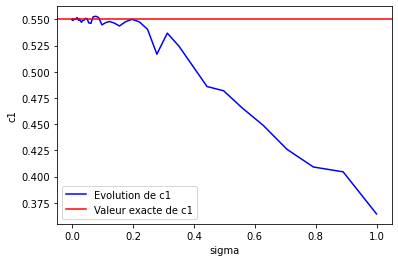

In [140]:
plt.plot(sigma, C1_prime , label = "Evolution de c1" , color = 'b')
plt.axhline(C1_1, label = "Valeur exacte de c1", color = 'red')

plt.xlabel('sigma')
plt.ylabel('c1')
plt.legend()

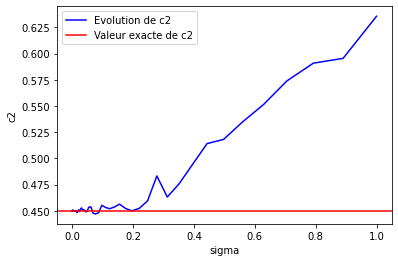

In [141]:
plt.plot(sigma, C2_prime , label = "Evolution de c2" , color = 'b')
plt.axhline(C2_1, label = "Valeur exacte de c2", color = 'red')

plt.xlabel('sigma')
plt.ylabel('c2')
plt.legend()

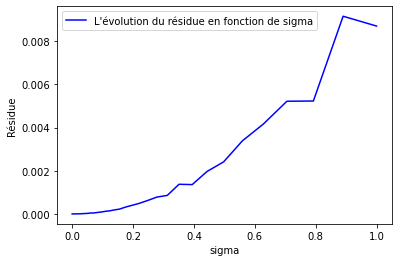

In [142]:
plt.plot(sigma, Res , label = "L'évolution du résidue en fonction de sigma" , color = 'b')
plt.xlabel('sigma')
plt.ylabel('Résidue')
plt.legend()

In [143]:
RMSE_1 = RMSE_vecteur ( C1_prime, C2_prime,U1_1, U2_1, X1_1, X2_1, X3_1 , Xi, Xf, n)

i =  0
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.0

No handles with labels found to put in legend.


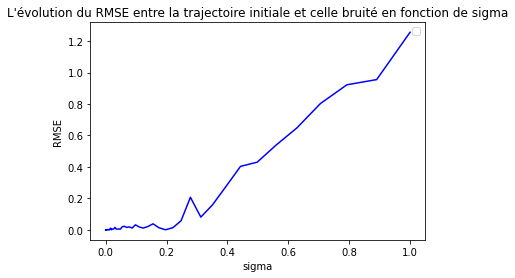

In [144]:
plt.plot(sigma, RMSE_1  , color = 'b')
plt.xlabel('sigma')
plt.ylabel('RMSE')
plt.title("L'évolution du RMSE entre la trajectoire initiale et celle bruité en fonction de sigma")
plt.legend()

### Etudions un seul cas.

Ajoutons du bruit.

In [145]:
U1__1 = U1_1 + np.random.normal (0, 0.1, size =n)
U2__1 = U2_1 + np.random.normal (0, 0.1, size =n)
X1__1 = X1_1 + np.random.normal (0, 0.1, size =n)
X2__1 = X2_1 + np.random.normal (0, 0.1, size =n)
X3__1 = X3_1 + np.random.normal (0, 0.1, size =n)

In [146]:
C1_1 = 0.55               
C2_1 = 0.45

x1i = -4                   # condition initiale de x1
x2i = -0.5                 # condition initiale de x2
x3i = pi/2              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3


In [147]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+1,3)

opti.minimize( R(U1__1,U2__1,X1__1,X2__1,X3__1, Lambda, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)

opti.subject_to( 0 <= c2 )

opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     6997

Total number of variables............................:     1505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [148]:
C1 = sol.value(c1)
C2 = sol.value(c2)


In [149]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1*dot(u1,u1)+C2*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1i)        
opti.subject_to( x2[0]==x2i)
opti.subject_to( x3[0]==x3i)

## pour les contraintes d'égaliter
opti.subject_to( x1[:n-1]+taux*u1[:n-1]*cos(x3[:n-1])==f(x1) )
opti.subject_to( x2[:n-1]+taux*u1[:n-1]*sin(x3[:n-1])==f(x2) )
opti.subject_to( x3[:n-1]+taux*u2[:n-1] ==f(x3))

## pour les conditions finales
opti.subject_to( x1[-1]==x1f)
opti.subject_to( x2[-1]==x2f)
opti.subject_to( x3[-1]==x3f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5495
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1503
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [150]:
X1__1_1 = sol.value(x1)
X2__1_1 = sol.value(x2)


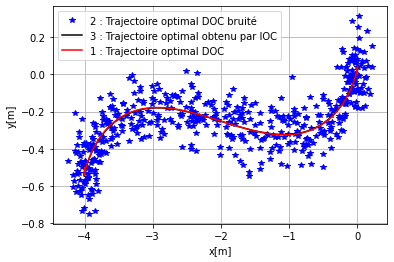

In [151]:
plt.plot(X1__1, X2__1 ,'*', color = 'b', label = '2 : Trajectoire optimal DOC bruité')
plt.plot(X1__1_1, X2__1_1 , color = 'black', label = "3 : Trajectoire optimal obtenu par IOC")
plt.plot(X1_1, X2_1 , color = 'red', label = '1 : Trajectoire optimal DOC')

plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

In [152]:
print(C1)
print(C2)

0.5412441795077843
0.4587558204922158
